In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
data.shape

(1000, 17)

In [8]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [10]:
data.columns 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

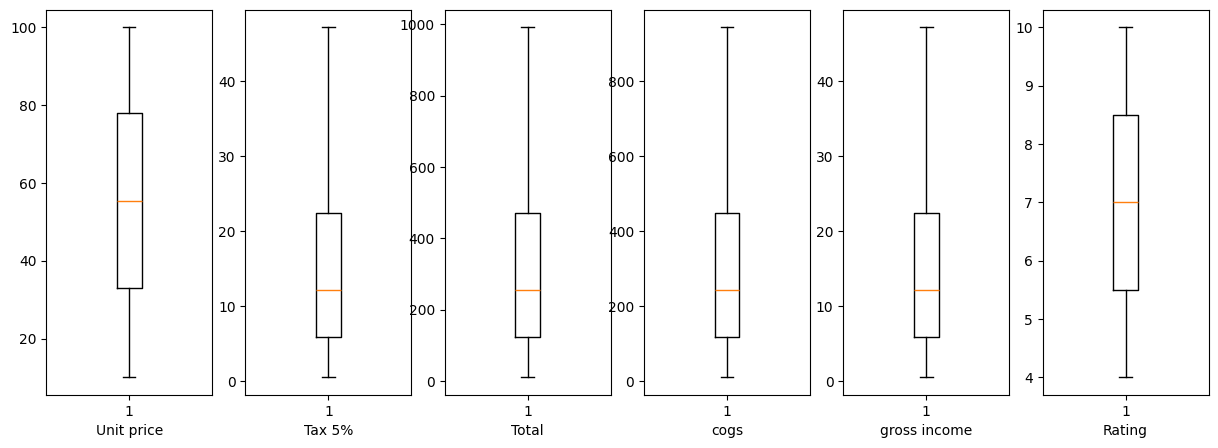

In [45]:
numerical_cols =  ['Unit price', 'Tax 5%',  'Total','cogs', 'gross income','Rating']


plt.figure(figsize=(15,5))
for i, col in enumerate(numerical_cols):

    ax = plt.subplot(1, len(numerical_cols),i+1)
    plt.boxplot(data[col])
    ax.set_xlabel(f'{col}')
    


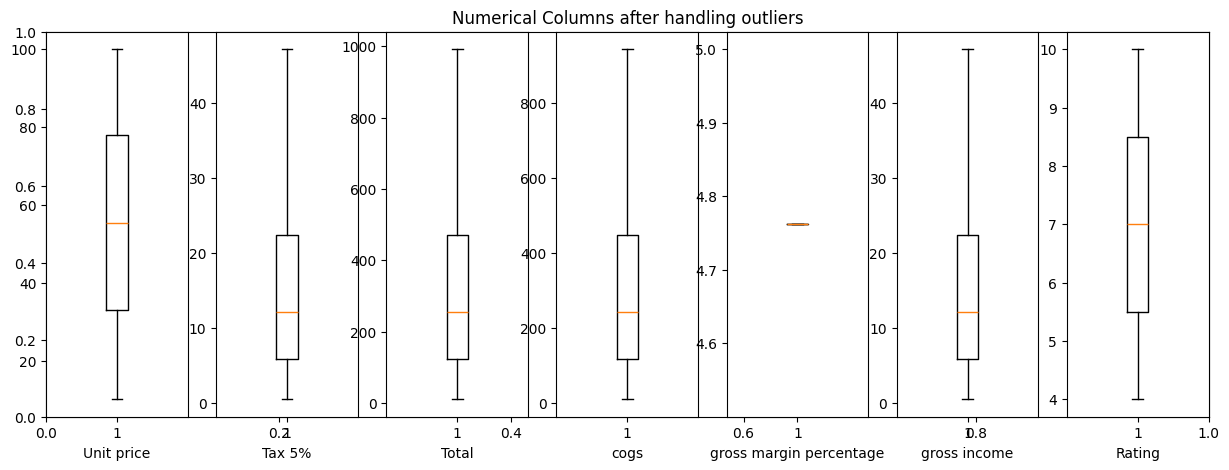

In [22]:
outlier_cols = ['Tax 5%',  'Total','cogs','gross income']

for col in outlier_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_limiit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    data[col] = np.clip(data[col], lower_limit, upper_limiit)


plt.figure(figsize=(15,5))
plt.title("Numerical Columns after handling outliers")
for i, col in enumerate(numerical_cols):
    ax = plt.subplot(1, len(numerical_cols),i+1)
    plt.boxplot(data[col])
    ax.set_xlabel(f'{col}')


In [23]:
data['gross margin percentage'].unique()

array([4.76190476])

In [25]:
data.drop(columns=['gross margin percentage'],axis=1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.83000,26.141500,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.40000,3.820000,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.31000,16.215500,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.76000,23.288000,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.17000,30.208500,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.017500,42.367500,1/29/2019,13:46,Ewallet,40.35000,2.017500,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,47.225813,991.742062,3/2/2019,17:16,Ewallet,944.51625,47.225813,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592000,33.432000,2/9/2019,13:22,Cash,31.84000,1.592000,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291000,69.111000,2/22/2019,15:33,Cash,65.82000,3.291000,4.1


In [27]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

C:\Users\dulin\AppData\Local\Temp\ipykernel_49092\2814229062.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [32]:
data_encoded = data.copy()

In [33]:
data_encoded

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.141500,548.971500,2019-01-05,2025-01-28 13:08:00,Ewallet,522.83000,4.761905,26.141500,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.820000,80.220000,2019-03-08,2025-01-28 10:29:00,Cash,76.40000,4.761905,3.820000,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.215500,340.525500,2019-03-03,2025-01-28 13:23:00,Credit card,324.31000,4.761905,16.215500,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288000,489.048000,2019-01-27,2025-01-28 20:33:00,Ewallet,465.76000,4.761905,23.288000,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.208500,634.378500,2019-02-08,2025-01-28 10:37:00,Ewallet,604.17000,4.761905,30.208500,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.017500,42.367500,2019-01-29,2025-01-28 13:46:00,Ewallet,40.35000,4.761905,2.017500,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,47.225813,991.742062,2019-03-02,2025-01-28 17:16:00,Ewallet,944.51625,4.761905,47.225813,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592000,33.432000,2019-02-09,2025-01-28 13:22:00,Cash,31.84000,4.761905,1.592000,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291000,69.111000,2019-02-22,2025-01-28 15:33:00,Cash,65.82000,4.761905,3.291000,4.1


In [34]:
from sklearn.preprocessing import LabelEncoder

categrical_cols = ['Branch','City','Customer type','Gender','Product line','Payment']

label_encoder = LabelEncoder()

for col in categrical_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

### EDA


<Axes: >

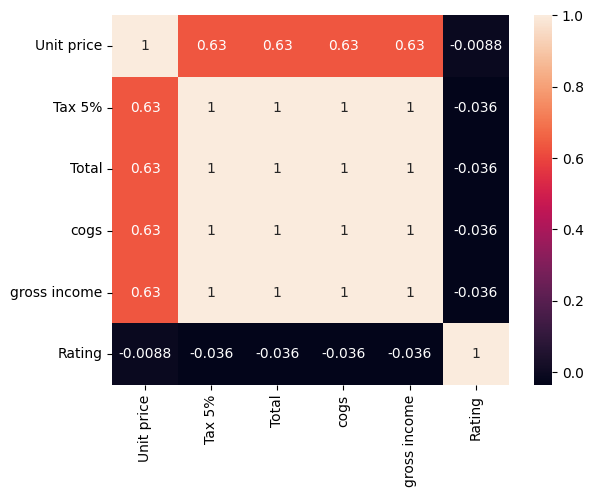

In [46]:
correlation = data_encoded[numerical_cols].corr()

sns.heatmap(correlation,annot=True)

In [51]:
y = data_encoded['gross income']

## Stationarity

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

adf_test = adfuller(y)
print('ADF Statistic: ', adf_test[0])
print('p-value', adf_test[1])

ADF Statistic:  -30.61108399895872
p-value 0.0


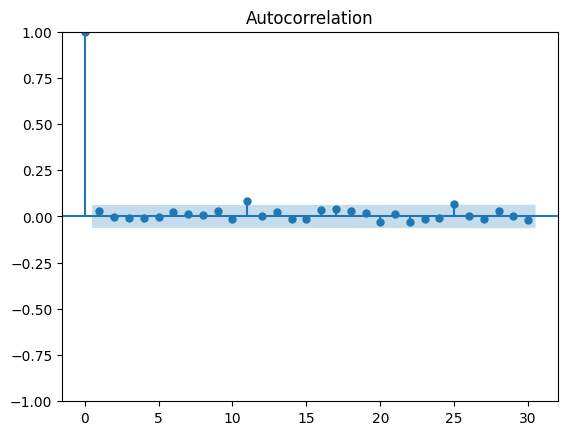

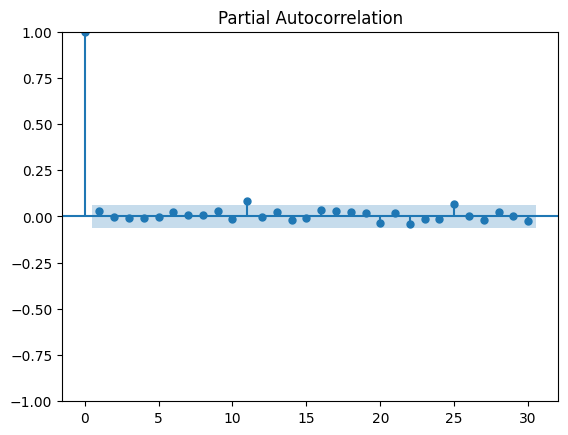

In [54]:
plot_acf(y)
plot_pacf(y)
plt.show()

In [55]:
model = ARIMA(y, order=(1, 0, 1)) 
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           gross income   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1418.471
Date:                Wed, 29 Jan 2025   AIC                           2844.942
Time:                        00:46:30   BIC                           2864.573
Sample:                             0   HQIC                          2852.403
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.739e-05      0.043      0.001      0.999      -0.083       0.084
ar.L1         -0.0283      1.035     -0.027      0.978      -2.056       2.000
ma.L1          0.0589      1.034      0.057      0.9

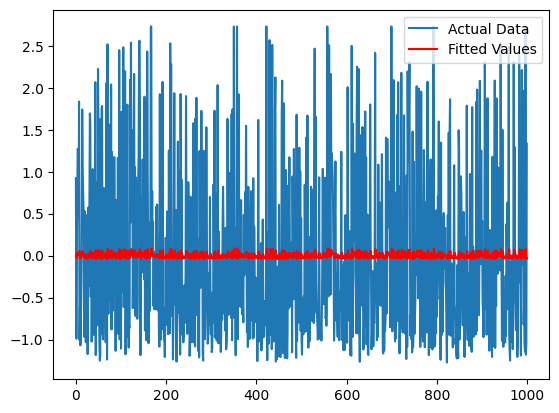

In [59]:
fitted_values = model_fit.predict(start=0, end=len(y)-1)

plt.plot(y, label='Actual Data')
plt.plot(fitted_values, label='Fitted Values', color='red')
plt.legend()
plt.show()

In [64]:
forecast_steps = 100
forecast_values = model_fit.forecast(steps=forecast_steps)

print(forecast_values)

1000    0.042571
1001   -0.001147
1002    0.000092
1003    0.000056
1004    0.000057
          ...   
1095    0.000057
1096    0.000057
1097    0.000057
1098    0.000057
1099    0.000057
Name: predicted_mean, Length: 100, dtype: float64


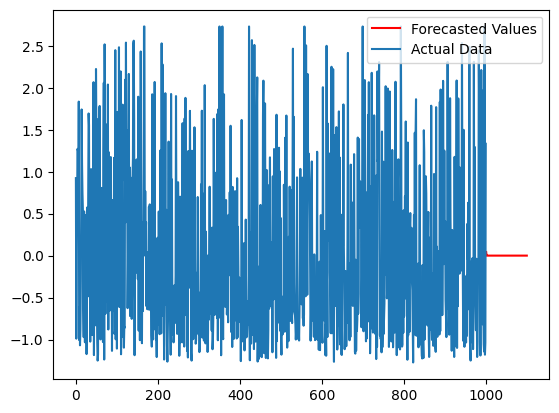

In [65]:
plt.plot(range(len(y), len(y) + forecast_steps), forecast_values, label='Forecasted Values', color='red')
plt.plot(y, label='Actual Data')

plt.legend()
plt.show()